# Extra 2 - Logistic Models

In [11]:
orings <- read.csv("data/orings.csv")

In [23]:
m <- glm(cbind(damage, 6-damage) ~ temp, family="binomial", data=orings)
summary(m)


Call:
glm(formula = cbind(damage, 6 - damage) ~ temp, family = "binomial", 
    data = orings)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


1. What is the estimated coefficient value for predictor temp?
   > `-0.21623`

2. Give an interpretation for this coefficient estimate.
   > 1 deg temp increase, `exp(-0.21623) = 0.805` times LESS likely failure.
   > 19.45% less likely.

3. The model summary shows the so-called Wald z-test for the coefficient temp. What is the underlying null hypothesis H0 to the given P-value?
   > $H_0: \beta_{temp} = 0$. P-value of coeff is 4.78e-05, significant at 5%, reject $H_0$

4. Use the residual deviance of this logistic regression model fit to judge how well the model fits
   > The residual deviance is approximately χ2-distributed with n-2 = 21 degrees of freedom under the null hypothesis H0 that the concretely specified model fits the underlying data generating process. This approximation works as long as the general logistic model assumptions (e.g., response variable is truly binomial and link function is correct) hold and when the number of spots m is not too small. Provided all this, what is this P-value and based thereon, would you reject this model fit? The R-functions `deviance` and `df.residual` help you extract the relevant information from the model fit object.

In [28]:
pchisq(q = deviance(m), df = df.residual(m), lower.tail = FALSE)

[1] 0.7164099

5. The launch temperature on the day of the Challenger crash was just below freeze point with 31°F. What probability of complete O-ring failure is predicted by the model?

In [26]:
logit <- coef(m)[[1]] + 31 * coef(m)[[2]]
odds  <- exp(logit)
prob  <- odds / (odds + 1)
prob

[1] 0.9930342

---
So, we see that the model predicts a very high probability for complete failure. If this was known before, the start and subsequent crash of the shuttle could have been prevented.

But, we need to acknowledge that the model prediction is quite an extrapolation as the data from the sample is solely on higher temperatures. The single observation at temperature 53°F in the sample has also an alarmingly high leverage on the model fit.

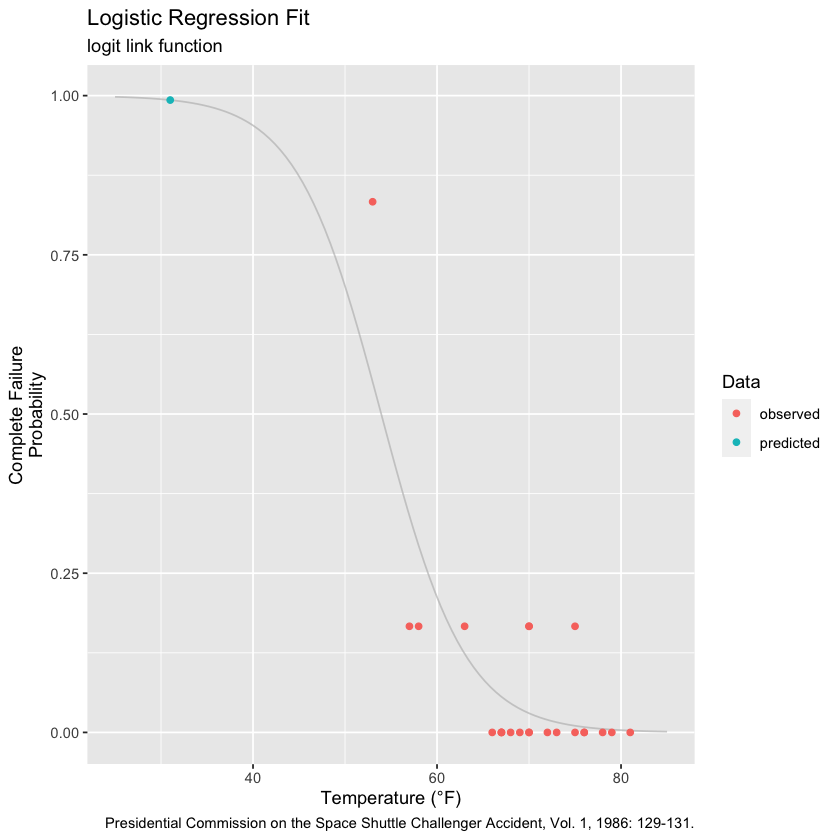

In [33]:
library("ggplot2")
orings2 <- orings |> 
  dplyr::mutate(damageProp = damage/6, type = "observed") |> 
  dplyr::add_row(temp = 31, damageProp = prob, damage = damageProp * 6, type = "predicted")

ggplot(data = orings2, mapping = aes(x = temp, y = damageProp)) +
  geom_function(fun = \(x) stats::plogis(q = coef(m)[1] + x * coef(m)[2]), col = "grey", alpha = .7) + 
  geom_point(mapping = aes(col = type)) + 
  xlim(25, 85) + labs(col = "Data", x = "Temperature (°F)", y = "Complete Failure\nProbability",
                      title = "Logistic Regression Fit", subtitle = "logit link function",
                      caption = "Presidential Commission on the Space Shuttle Challenger Accident, Vol. 1, 1986: 129-131.")